In [ ]:
import jupyter

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
(X_train, Y_train), (X_test, Y_test) = keras.datasets.mnist.load_data()

In [ ]:
X_train = X_train/255
X_test = X_test/255

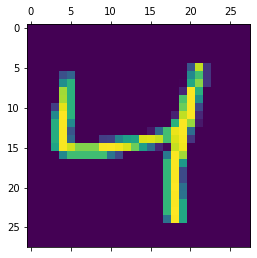

In [ ]:
plt.matshow(X_train[2])

In [ ]:
model = keras.Sequential([
        keras.layers.Flatten(input_shape = (28,28)),
        keras.layers.Dense(100, activation = 'relu'),
        keras.layers.Dense(100, activation = 'sigmoid')
])
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
model.fit(X_train,Y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3247 - accuracy: 0.9117
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1424 - accuracy: 0.9588
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0990 - accuracy: 0.9714
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0762 - accuracy: 0.9774
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0610 - accuracy: 0.9812
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0498 - accuracy: 0.9850
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0402 - accuracy: 0.9876
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0330 - accuracy: 0.9899
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0281 - accuracy: 0.9913
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.023

In [ ]:
model.evaluate(X_test,Y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.0878 - accuracy: 0.9757


[0.08779632300138474, 0.9757000207901001]

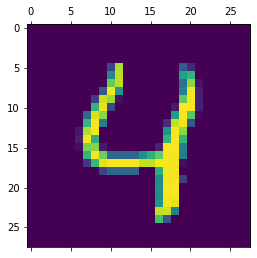

In [ ]:
plt.matshow(X_test[4])

In [ ]:
Y_predicted = model.predict(X_test)
Y_predicted[4]

array([2.0457566e-02, 3.5944350e-07, 5.9527665e-02, 3.9541069e-06,
       9.9998701e-01, 2.2439361e-03, 5.2217901e-02, 2.4691644e-01,
       1.6068846e-02, 9.9739468e-01, 1.5565668e-10, 5.6714550e-10,
       1.6451076e-09, 5.4022731e-10, 7.1362249e-10, 2.3988081e-10,
       3.8637843e-10, 8.4470708e-11, 2.4975794e-10, 1.0329024e-09,
       7.7723017e-10, 2.9081453e-09, 7.5939943e-10, 8.6199403e-10,
       7.4897338e-10, 4.1053139e-09, 2.3065726e-10, 3.0276632e-09,
       8.2669155e-10, 9.6933606e-10, 1.9175556e-10, 9.1463659e-10,
       1.9186870e-09, 1.5246880e-10, 1.5137819e-09, 1.9509698e-09,
       1.3636547e-09, 3.8405443e-10, 4.2659837e-10, 5.4788335e-10,
       1.7371922e-09, 3.6724820e-10, 2.0478411e-10, 2.3308344e-10,
       8.6756252e-10, 7.9257173e-10, 3.3274059e-10, 9.9646746e-10,
       3.4433773e-10, 1.0938315e-09, 1.0048902e-09, 4.8650534e-10,
       9.2978103e-10, 1.1450887e-09, 5.9154165e-10, 1.1810659e-09,
       3.2493100e-10, 1.6442450e-09, 1.0579437e-09, 1.2470023e

In [ ]:
np.argmax(Y_predicted[4])

4

In [ ]:
Y_predicted_all = [np.argmax(i) for i in Y_predicted]

In [ ]:
cm = tf.math.confusion_matrix(labels = Y_test, predictions = Y_predicted_all)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 971,    0,    0,    1,    0,    1,    3,    1,    3,    0],
       [   0, 1126,    3,    0,    0,    1,    2,    1,    2,    0],
       [   8,    2,  997,    4,    2,    0,    3,    4,    9,    3],
       [   0,    1,    2,  994,    0,    1,    0,    5,    4,    3],
       [   4,    0,    2,    1,  928,    2,    5,    4,    0,   36],
       [   1,    0,    0,   10,    0,  863,    7,    2,    6,    3],
       [   3,    2,    1,    1,    1,    2,  945,    0,    3,    0],
       [   1,    4,   10,    2,    0,    0,    0, 1001,    1,    9],
       [   3,    0,    4,    5,    1,    4,    2,    3,  947,    5],
       [   2,    2,    0,    7,    3,    1,    0,    8,    1,  985]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

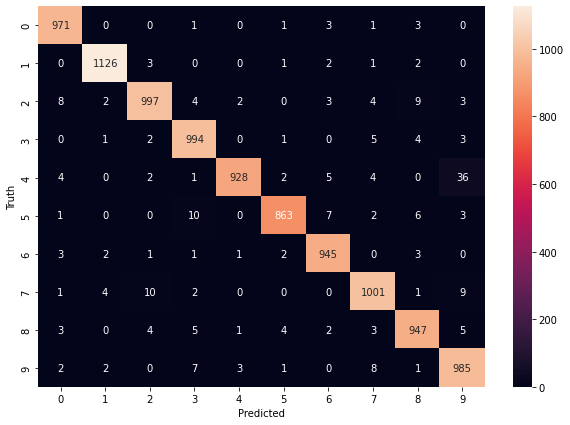

In [ ]:
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')